<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 7</h3>
    <h3>Ejercicio 3</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

https://pypi.org/project/autots/

In [ ]:
! pip install AutoTS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.0/851.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from autots import AutoTS
import matplotlib.pyplot as plt


In [ ]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/DailyDelhiClimateTrain.csv')
df.date = pd.to_datetime(df.date)
df.index = df['date']
df = df.drop(columns=['date'])
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
freq_infer = pd.infer_freq(df.index)
print(f"Frecuencia inferida: {freq_infer}")

Frecuencia inferida: D


In [ ]:
df.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
# aqui defino el numero de train / test

import math

numero_separador= len(df)*.9
numero_separador = math.trunc(numero_separador)
print(numero_separador)


1315


In [ ]:
train = df[0:numero_separador]
test = df[numero_separador:]

In [ ]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


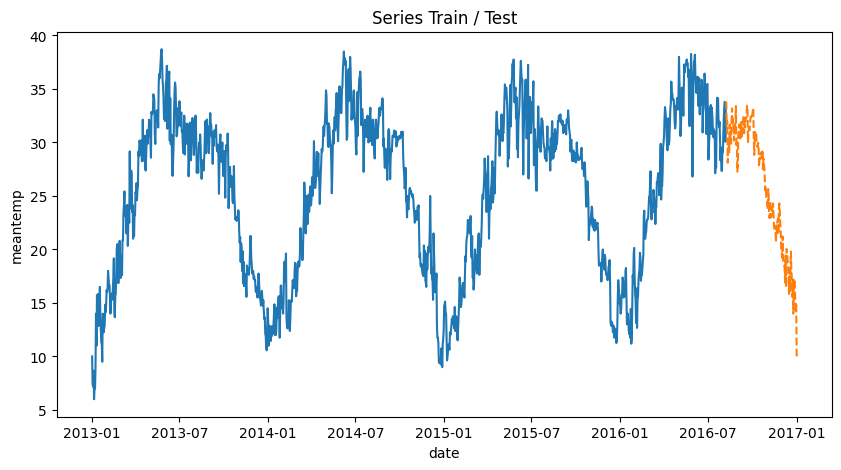

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(train.index, train['meantemp'], label='Train')
plt.plot(test.index, test['meantemp'], label='Test', linestyle='--')

plt.title('Series Train / Test')
plt.xlabel('date')
plt.ylabel('meantemp')

plt.show()

Parametros =

- model_list =
Use appropriate model lists, especially the predefined lists:
superfast (simple naive models) and fast (more complex but still faster models, optimized for many series)
fast_parallel (a combination of fast and parallel) or parallel, given many CPU cores are available
n_jobs usually gets pretty close with ='auto' but adjust as necessary for the environment

 Posibles parametros de " model_list"

- model_list = modelos  = ['ARIMA', 'FBProphet'] ,
- model_list = 'univariate'
- model_list = 'fast'
- model_list = 'superfast'
- model_list = 'fast_parallel'

Modelos usados en clase para facilitar tiempos ( model_list = superfast=

Son modelos que van desde muy simples (naive) hasta más complejos (GLS, motif)

- ConstantNaive: Predice que todos los valores futuros serán constantes e iguales a un valor fijo.

-LastValueNaive: Predice que el valor futuro será igual al último valor observado en la serie temporal.

-AverageValueNaive: Usa el promedio de todos los valores anteriores para predecir el futuro.

-GLS (Generalized Least Squares): Se ajusta un modelo lineal teniendo en cuenta posibles correlaciones y heterocedasticidad en los errores.

-SeasonalNaive: Predice que los valores futuros van a ser iguales a los valores observados en el mismo periodo en ciclos anteriores.

-SeasonalityMotif: Busca patrones estacionales específicos en la serie temporal y los usa para hacer predicciones.

-SectionalMotif: Este modelo divide la serie temporal en secciones y busca motivos recurrentes dentro de estas secciones.

In [ ]:
model = AutoTS(
    forecast_length=len(test),
    frequency='D',
    prediction_interval=0.95,
    ensemble=None,
    models_mode='deep',
    model_list = 'superfast'  ,
    max_generations=10,   # intenta optimizar el modelo a traves de 10 iteraciones de ajuste.
    num_validations=3,
    no_negatives=True,
    n_jobs='auto')

Using 1 cpus for n_jobs.


In [ ]:
'''
Parametros =
- model_list =
Utilice listas de modelos apropiadas, especialmente las listas predefinidas:
superfast (simple naive models) y fast (Modelos más complejos pero aún más rápidos, optimizados para muchas series.)
fast_parallel (una combinacion de fast y parallel) o parallel, dado que hay muchos núcleos de CPU disponibles
n_jobs normalmente se acerca bastante a ='auto' pero ajuste según sea necesario para el ambiente de trabajo.
'''
from autots.models.model_list import model_lists
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'scalable', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [ ]:
# Listado de modelos en particular
print(model_lists['superfast'])

['ConstantNaive', 'LastValueNaive', 'AverageValueNaive', 'GLS', 'SeasonalNaive', 'SeasonalityMotif', 'SectionalMotif']


In [ ]:
print(model_lists['fast'])

{'ConstantNaive': 1, 'LastValueNaive': 1.5, 'AverageValueNaive': 1, 'GLS': 1, 'SeasonalNaive': 1, 'GLM': 1, 'ETS': 1, 'VAR': 0.8, 'VECM': 0.8, 'WindowRegression': 0.5, 'DatepartRegression': 0.8, 'UnivariateMotif': 1, 'SectionalMotif': 1, 'NVAR': 0.3, 'MAR': 0.25, 'RRVAR': 0.4, 'KalmanStateSpace': 0.4, 'MetricMotif': 1, 'Cassandra': 0.6, 'SeasonalityMotif': 1.5, 'FFT': 0.8, 'BallTreeMultivariateMotif': 0.4}


In [ ]:
print(model_lists['univariate'])

['SeasonalityMotif', 'SeasonalNaive', 'GLM', 'ConstantNaive', 'AverageValueNaive', 'ARIMA', 'GLS', 'UnivariateMotif', 'Theta', 'PreprocessingRegression', 'ARDL', 'NeuralProphet', 'FFT', 'MLEnsemble', 'ETS', 'KalmanStateSpace', 'DatepartRegression', 'FBProphet', 'UnobservedComponents', 'ARCH', 'LastValueNaive', 'UnivariateRegression', 'MetricMotif']


In [ ]:
modelAutoTS = model.fit(train['meantemp'])
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in generation 0 of 10
Model Num

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 23 with model GLS in generation 0 of 10
Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 30 with model ConstantNaive in generation 0 of 10
Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 0 of 10
Model Number: 36 with model ConstantNaive in generation 0 of 10
Model Number: 37 with model SeasonalNaive in generation 0 of 10
Model Number: 38 with model SectionalMotif in generation 0 of 10
Model Number: 39 with model SectionalMotif in generation 0 of 10
Model Number: 40 with model ConstantNaive in generation 0 of 10
Model Number: 41 with model AverageValueNaive in generation 0 of 10
Model Number: 42 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 42 in generation 0: SectionalMotif
Model

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 46 with model ConstantNaive in generation 0 of 10
Model Number: 47 with model AverageValueNaive in generation 0 of 10
Model Number: 48 with model SeasonalityMotif in generation 0 of 10
Model Number: 49 with model GLS in generation 0 of 10
Model Number: 50 with model AverageValueNaive in generation 0 of 10
Model Number: 51 with model SectionalMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 52 in generation 0: SectionalMotif
Model Number: 53 with model ConstantNaive in generation 0 of 10
Model Number: 54 with model SeasonalityMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 55 with model SectionalMotif in generation 1 of 10
Model Number: 56 with model LastValueNaive in generation 1 of 10
Model Number: 57 with model SeasonalNaive in generation 1 of 10
Model Number: 58 with model SeasonalityMotif in generation 1 of 

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 104 with model ConstantNaive in generation 2 of 10
Model Number: 105 with model AverageValueNaive in generation 2 of 10
Model Number: 106 with model LastValueNaive in generation 2 of 10
Model Number: 107 with model SeasonalityMotif in generation 2 of 10
Model Number: 108 with model LastValueNaive in generation 2 of 10
Model Number: 109 with model SeasonalityMotif in generation 2 of 10
Model Number: 110 with model LastValueNaive in generation 2 of 10
Model Number: 111 with model LastValueNaive in generation 2 of 10
Model Number: 112 with model LastValueNaive in generation 2 of 10
Model Number: 113 with model SeasonalityMotif in generation 2 of 10
Model Number: 114 with model LastValueNaive in generation 2 of 10
Model Number: 115 with model SectionalMotif in generation 2 of 10
Model Number: 116 with model SectionalMotif in generation 2 of 10
Model Number: 117 with model GLS in generation 2 of 10
Model Number: 118 with model AverageValueNaive in generation 2 of 10
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 3 of 10
Model Number: 125 with model SeasonalityMotif in generation 3 of 10
Model Number: 126 with model SectionalMotif in generation 3 of 10
Model Number: 127 with model LastValueNaive in generation 3 of 10
Model Number: 128 with model SectionalMotif in generation 3 of 10
Model Number: 129 with model SeasonalityMotif in generation 3 of 10
Model Number: 130 with model ConstantNaive in generation 3 of 10
Model Number: 131 with model AverageValueNaive in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 132 with model SectionalMotif in generation 3 of 10
Model Number: 133 with model ConstantNaive in generation 3 of 10
Model Number: 134 with model SeasonalityMotif in generation 3 of 10
Model Number: 135 with model SeasonalityMotif in generation 3 of 10
Model Number: 136 with model LastValueNaive in generation 3 of 10
Model Number: 137 with model SectionalMotif in generation 3 of 10
Model Number: 138 with model SeasonalNaive in generation 3 of 10
Model Number: 139 with model SeasonalityMotif in generation 3 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'span': 420}, '1': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '4': {'model': 'Gamma', 'phi': 1, 'window': 900, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 145 with model GLS in generation 3 of 10
Model Number: 146 with model GLS in generation 3 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 2, 'method': 'Mean'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'lag_1': 12, 'method': 'Mean'}, '3': {'discretization': 'lower', 'n_bins': 10}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}}") in model 146 in generation 3: GLS
Model Number: 147 with model AverageValueNaive in generation 3 of 10
Model Number: 148 with model SectionalMotif in generation 3 of 10
Model Number: 149 with model SeasonalNaive in generation 3 of 10
Model Number: 150 with model SeasonalNaive in generation 3 of 10
Model Number: 151 with model AverageValueNaive in generation 3 of 10
Model Number: 152 with model SeasonalityMotif in generation 3 of 10
Model Number:

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 198 with model LastValueNaive in generation 5 of 10
Model Number: 199 with model LastValueNaive in generation 5 of 10
Model Number: 200 with model SeasonalityMotif in generation 5 of 10
Model Number: 201 with model SeasonalityMotif in generation 5 of 10
Model Number: 202 with model SeasonalityMotif in generation 5 of 10
Model Number: 203 with model SeasonalNaive in generation 5 of 10
Model Number: 204 with model SectionalMotif in generation 5 of 10
Model Number: 205 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}}") in model 205 in generation 5: SectionalMotif
Model Number: 206 with model SeasonalNaive in generation 5 of 10
Model Number: 207 with model SeasonalityMotif in generation 5 of 10
Model Number: 208 with model SeasonalNaive i

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 213 with model GLS in generation 5 of 10
Model Number: 214 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'n_harmonics': -0.95, 'detrend': 'quadratic'}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '4': {'det_order': 0, 'k_ar_diff': 0}}") in model 214 in generation 5: SectionalMotif
Model Number: 215 with model SeasonalityMotif in generation 5 of 10
Model Number: 216 with model AverageValueNaive in generation 5 of 10
Model Number: 217 with model SectionalMotif in generation 5 of 10
Model Number: 218 with model AverageValueNaive in generation 5 of 10
Model Number: 219 with model SectionalMotif in generation 5 of 10
Model Number: 220 with model Se

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Model Number: 234 with model GLS in generation 6 of 10
Model Number: 235 with model SectionalMotif in generation 6 of 10
Model Number: 236 with model SeasonalNaive in generation 6 of 10
Model Number: 237 with model SeasonalityMotif in generation 6 of 10
Model Number: 238 with model AverageValueNaive in generation 6 of 10
Model Number: 239 with model SectionalMotif in generation 6 of 10
Model Number: 240 with model SeasonalityMotif in generation 6 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}, '1': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 1000, 'min_samples_leaf': 1, 'bootstrap': True}}, 'datepart_method': ['db2_365.25_12_0.5', 'morlet_7_7_1'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 282 with model SeasonalityMotif in generation 8 of 10
Model Number: 283 with model SeasonalityMotif in generation 8 of 10
Model Number: 284 with model SeasonalityMotif in generation 8 of 10
Model Number: 285 with model SeasonalNaive in generation 8 of 10
Model Number: 286 with model LastValueNaive in generation 8 of 10
Model Number: 287 with model SeasonalityMotif in generation 8 of 10
Model Number: 288 with model LastValueNaive in generation 8 of 10
Model Number: 289 with model SectionalMotif in generation 8 of 10
Model Number: 290 with model SeasonalNaive in generation 8 of 10
Model Number: 291 with model AverageValueNaive in generation 8 of 10
Model Number: 292 with model SeasonalityMotif in generation 8 of 10
Model Number: 293 with model SectionalMotif in generation 8 of 10
Model Number: 294 with model AverageValueNaive in generation 8 of 10
Model Number: 295 with model AverageValueNaive in generation 8 of 10
Model Number: 296 with model GLS in generation 8 of 10
Mode

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 303 with model SeasonalityMotif in generation 8 of 10
Model Number: 304 with model SeasonalNaive in generation 8 of 10
Model Number: 305 with model SectionalMotif in generation 8 of 10
Model Number: 306 with model SeasonalNaive in generation 8 of 10
New Generation: 9 of 10
Model Number: 307 with model SeasonalityMotif in generation 9 of 10
Model Number: 308 with model SeasonalityMotif in generation 9 of 10
Model Number: 309 with model SectionalMotif in generation 9 of 10
Model Number: 310 with model GLS in generation 9 of 10
Model Number: 311 with model LastValueNaive in generation 9 of 10
Model Number: 312 with model SeasonalityMotif in generation 9 of 10
Model Number: 313 with model SeasonalNaive in generation 9 of 10
Model Number: 314 with model SeasonalityMotif in generation 9 of 10
Model Number: 315 with model SeasonalityMotif in generation 9 of 10
Model Number: 316 with model GLS in generation 9 of 10
Model Number: 317 with model SeasonalNaive in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:1637: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_values, df], axis=0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:1637: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_values, df], axis=0)


Model Number: 320 with model SectionalMotif in generation 9 of 10
Model Number: 321 with model SectionalMotif in generation 9 of 10
Model Number: 322 with model SectionalMotif in generation 9 of 10
Model Number: 323 with model SectionalMotif in generation 9 of 10
Model Number: 324 with model SeasonalityMotif in generation 9 of 10
Model Number: 325 with model SeasonalNaive in generation 9 of 10
Model Number: 326 with model SeasonalityMotif in generation 9 of 10
Model Number: 327 with model SeasonalNaive in generation 9 of 10
Model Number: 328 with model SeasonalNaive in generation 9 of 10
Model Number: 329 with model SectionalMotif in generation 9 of 10
Model Number: 330 with model SeasonalityMotif in generation 9 of 10
Model Number: 331 with model SeasonalityMotif in generation 9 of 10
Model Number: 332 with model AverageValueNaive in generation 9 of 10
Model Number: 333 with model SectionalMotif in generation 9 of 10
Template Eval Error: Exception("Transformer FastICA failed on invers

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 354 with model SeasonalityMotif in generation 10 of 10
Model Number: 355 with model SectionalMotif in generation 10 of 10
Validation Round: 1
Model Number: 1 of 54 with model SeasonalityMotif for Validation 1
📈 1 - SeasonalityMotif with avg smape 16.58: 
Model Number: 2 of 54 with model SeasonalityMotif for Validation 1
📈 2 - SeasonalityMotif with avg smape 11.7: 
Model Number: 3 of 54 with model SeasonalityMotif for Validation 1
3 - SeasonalityMotif with avg smape 11.7: 
Model Number: 4 of 54 with model SeasonalityMotif for Validation 1
4 - SeasonalityMotif with avg smape 12.32: 
Model Number: 5 of 54 with model SectionalMotif for Validation 1
5 - SectionalMotif with avg smape 21.82: 
Model Number: 6 of 54 with model SectionalMotif for Validation 1
6 - SectionalMotif with avg smape 21.8: 
Model Number: 7 of 54 with model SectionalMotif for Validation 1
7 - SectionalMotif with avg smape 22.46: 
Model Number: 8 of 54 with model SectionalMotif for Validation 1
8 - Sectional

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - SeasonalNaive with avg smape 14.88: 
Model Number: 25 of 54 with model SeasonalNaive for Validation 1
25 - SeasonalNaive with avg smape 15.42: 
Model Number: 26 of 54 with model SeasonalNaive for Validation 1
26 - SeasonalNaive with avg smape 22.85: 
Model Number: 27 of 54 with model SeasonalNaive for Validation 1
27 - SeasonalNaive with avg smape 11.69: 
Model Number: 28 of 54 with model GLS for Validation 1
28 - GLS with avg smape 15.22: 
Model Number: 29 of 54 with model AverageValueNaive for Validation 1
29 - AverageValueNaive with avg smape 15.12: 
Model Number: 30 of 54 with model GLS for Validation 1
30 - GLS with avg smape 15.29: 
Model Number: 31 of 54 with model LastValueNaive for Validation 1
31 - LastValueNaive with avg smape 19.98: 
Model Number: 32 of 54 with model LastValueNaive for Validation 1
32 - LastValueNaive with avg smape 16.18: 
Model Number: 33 of 54 with model LastValueNaive for Validation 1
33 - LastValueNaive with avg smape 16.18: 
Model Number: 34 of 5

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - SeasonalNaive with avg smape 6.77: 
Model Number: 25 of 54 with model SeasonalNaive for Validation 2
25 - SeasonalNaive with avg smape 21.65: 
Model Number: 26 of 54 with model SeasonalNaive for Validation 2
26 - SeasonalNaive with avg smape 21.11: 
Model Number: 27 of 54 with model SeasonalNaive for Validation 2
27 - SeasonalNaive with avg smape 5.72: 
Model Number: 28 of 54 with model GLS for Validation 2
28 - GLS with avg smape 8.12: 
Model Number: 29 of 54 with model AverageValueNaive for Validation 2
29 - AverageValueNaive with avg smape 8.22: 
Model Number: 30 of 54 with model GLS for Validation 2
30 - GLS with avg smape 8.09: 
Model Number: 31 of 54 with model LastValueNaive for Validation 2
31 - LastValueNaive with avg smape 13.2: 
Model Number: 32 of 54 with model LastValueNaive for Validation 2
32 - LastValueNaive with avg smape 13.69: 
Model Number: 33 of 54 with model LastValueNaive for Validation 2
33 - LastValueNaive with avg smape 13.69: 
Model Number: 34 of 54 with

/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [ ]:
# Print de los detalles del mejor modelo.
print(model)

Initiated AutoTS object with best model: 
SeasonalityMotif
{'fillna': 'akima', 'transformations': {'0': 'AlignLastValue', '1': 'RollingMeanTransformer', '2': 'StandardScaler', '3': 'Slice', '4': 'MinMaxScaler'}, 'transformation_params': {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'fixed': False, 'window': 360, 'macro_micro': True, 'center': False}, '2': {}, '3': {'method': 0.9}, '4': {}}}
{'window': 15, 'point_method': 'mean', 'distance_metric': 'canberra', 'k': 10, 'datepart_method': 'common_fourier', 'independent': True}
Validation: 0, 1, 2, 3
SMAPE: 6.1264033620969505, 12.413911399601304, 5.403348139672657, 13.734066364915051
MAE: 1.954555843707191, 2.20713513648645, 1.6739458402408578, 2.7422630321970063
SPL: 0.6096467621232373, 0.8143320130164157, 0.4201647092161049, 1.0107006171653805


El mejor modelo seleccionado es el SeasonalNaive.

serie de pasos que se aplican a los datos de la serie temporal para prepararlos adecuadamente antes de entrenar el modelo de predicción=

- fillna: Se utiliza rolling_mean_24 para llenar los valores nulos, que es un promedio móvil de 24 períodos.
- transformations: Una serie de transformaciones que se aplican a los datos antes del modelado.
- LevelShiftTransformer: Detecta y ajusta cambios abruptos en los niveles de la serie temporal.
- MinMaxScaler: Escala los datos a un rango entre 0 y 1.
- SeasonalDifference: Diferenciación estacional para remover estacionalidad.

method: lastvalue, lag_1: 15, lag_2: 7

Esta sección describe los parámetros específicos del modelo **SeasonalNaive**:
- method: Método utilizado, que es lastvalue, indicando que la predicción se basa en el último valor observado.
- lag_1: considera valores anteriores con desfase de 15 períodos.
- lag_2: considera valores anteriores con desfase de 7 períodos.

In [ ]:
# Metricas manuales
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['meantemp'], prediction.forecast)
rmse = np.sqrt(mean_squared_error(test['meantemp'], prediction.forecast))


print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.4806185042365836
RMSE: 1.8612792860774416


In [ ]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

In [ ]:
#declarar primero el "modelo" del objeto AutoTS
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
# model.fit(train['meantemp'])
# prediction = model.predict(forecast_length=len(test))

In [ ]:
#   precisión de todos los resultados del modelo probado
model_results = model.results()

validation_results = model.results("validation")

In [ ]:
validation_results

,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,dwd_weighted,matse_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score,lowest_series_mape,lowest_series_mape_name,highest_series_mape,highest_series_mape_name
201,8f80fa9509943696e099c6c2ca978a8c,SectionalMotif,"{""window"": 50, ""point_method"": ""mean"", ""distan...","{""fillna"": ""akima"", ""transformations"": {""0"": ""...",0,1,6.312749,2.028604,2.392669,1.378946,...,86.178607,0.029216,0.564626,0.496599,6.7615,1.670073e+01,7.976474,meantemp,7.976474,meantemp
25,1657fddf0150d065d8168aa94c812ce6,SectionalMotif,"{""window"": 50, ""point_method"": ""mean"", ""distan...","{""fillna"": ""akima"", ""transformations"": {""0"": ""...",0,1,6.328120,2.033500,2.395544,1.391484,...,85.617872,0.029364,0.578231,0.428571,5.1570,1.676045e+01,7.995725,meantemp,7.995725,meantemp
88,3b19ad388c373695b4cb24dc73bdc551,SectionalMotif,"{""window"": 50, ""point_method"": ""mean"", ""distan...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,6.328120,2.033500,2.395544,1.391484,...,85.617872,0.029364,0.578231,0.428571,7.3195,1.676120e+01,7.995725,meantemp,7.995725,meantemp
322,ed72e695d4128dab20c9e299f397fc9b,SectionalMotif,"{""window"": 50, ""point_method"": ""mean"", ""distan...","{""fillna"": ""zero"", ""transformations"": {""0"": ""c...",0,1,6.366536,2.042730,2.399922,1.373611,...,82.722508,0.029085,0.557823,0.517007,0.0655,1.681416e+01,8.032017,meantemp,8.032017,meantemp
250,bb3a79833736ce517094df9b79d83cb2,SectionalMotif,"{""window"": 50, ""point_method"": ""mean"", ""distan...","{""fillna"": ""zero"", ""transformations"": {""0"": ""c...",0,1,6.378978,2.046691,2.403682,1.373550,...,82.731442,0.029380,0.557823,0.517007,0.1987,1.685789e+01,8.047592,meantemp,8.047592,meantemp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,6f54503aec6354eef6956d385a791822,SeasonalityMotif,"{""window"": 10, ""point_method"": ""median"", ""dist...","{""fillna"": ""time"", ""transformations"": {""0"": ""M...",0,1,181.834043,1091.686327,1310.034744,16.328495,...,933.037577,33.732570,0.938776,0.530612,0.0454,1.042681e+04,4292.511721,meantemp,4292.511721,meantemp
47,2746d71f4b25114069a560bcdb5f47b1,GLS,{},"{""fillna"": ""cubic"", ""transformations"": {""0"": ""...",0,1,161.348724,1400.192229,1905.393125,27.506139,...,1222.968618,43.264231,1.000000,0.530612,0.9302,1.184914e+04,5505.557237,meantemp,5505.557237,meantemp
130,5f48e2508a00bf634972eceb6bbb28eb,SeasonalityMotif,"{""window"": 5, ""point_method"": ""closest"", ""dist...","{""fillna"": ""akima"", ""transformations"": {""0"": ""...",0,1,190.672619,1529.673861,1534.893284,11.797829,...,1445.573774,47.266169,0.006803,0.571429,0.0342,1.680259e+04,6014.679142,meantemp,6014.679142,meantemp
272,cb37369d330df3ad203848f0cd0cee2c,SectionalMotif,"{""window"": 15, ""point_method"": ""mean"", ""distan...","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0,1,45.543433,10.436959,12.858207,1.491761,...,93.300944,0.321518,0.000000,0.557823,0.0440,5.159503e+04,41.038134,meantemp,41.038134,meantemp


In [ ]:
# Aqui podemos ver las bandas de confianza superiores e inferiores
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

In [ ]:
forecasts_up.head()

,meantemp
2016-08-08,34.712536
2016-08-09,40.201039
2016-08-10,35.618959
2016-08-11,35.239872
2016-08-12,35.586476


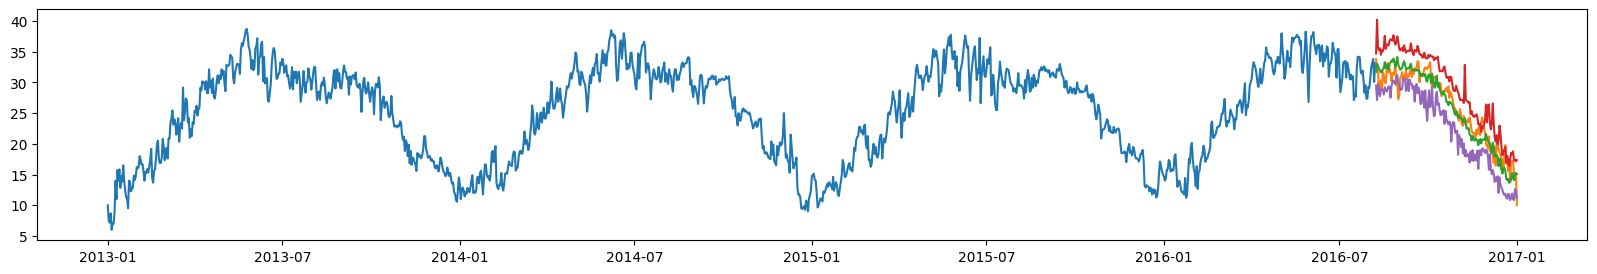

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,3))
ax.plot(train['meantemp'])
ax.plot(test['meantemp'])
ax.plot(prediction.forecast)
ax.plot(prediction.upper_forecast)
ax.plot(prediction.lower_forecast)

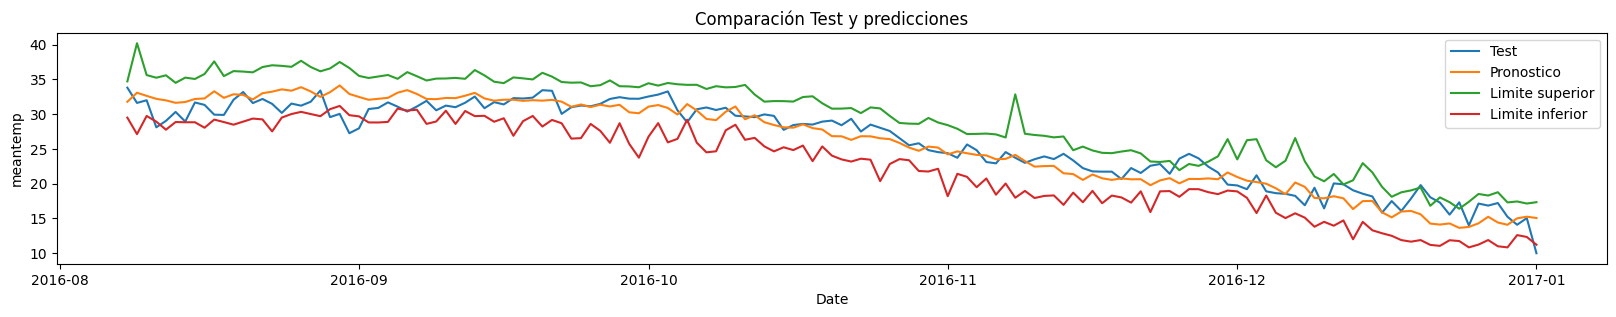

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot(test['meantemp'], label='Test')
ax.plot(prediction.forecast, label='Pronostico')
ax.plot(prediction.upper_forecast, label='Limite superior')
ax.plot(prediction.lower_forecast, label='Limite inferior')

ax.set_title('Comparación Test y predicciones')
ax.set_xlabel('Date')
ax.set_ylabel('meantemp')

ax.legend()

plt.show()


Ahora agregamos regresores.

Parametro =  "future_regressor" que se usa para determinar regresores que se espera que estén disponibles en el futuro se usan para hacer predicciones. Los datos tienen que estar alineados temporalmente con el horizonte de pronóstico.



In [ ]:
modelAutoTS = model.fit(train['meantemp'],future_regressor=train['humidity'])
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 518 with model SeasonalityMotif in generation 0 of 10
Model Number: 519 with model SectionalMotif in generation 0 of 10
Model Number: 520 with model SeasonalNaive in generation 0 of 10
Model Number: 521 with model GLS in generation 0 of 10
Model Number: 522 with model AverageValueNaive in generation 0 of 10
Model Number: 523 with model LastValueNaive in generation 0 of 10
Model Number: 524 with model SeasonalNaive in generation 0 of 10
New Generation: 1 of 10
Model Number: 525 with model SectionalMotif in generation 1 of 10
Model Number: 526 with model LastValueNaive in generation 1 of 10
Model Number: 527 with model SeasonalNaive in generation 1 of 10
Model Number: 528 with model AverageValueNaive in generation 1 of 10
Model Number: 529 with model SeasonalityMotif in generation 1 of 10
Model Number: 530 with model SectionalMotif in generation 1 of 10
Model Number: 531 with model SeasonalityMotif in generation 1 of 10
Template Ev

/usr/local/lib/python3.10/dist-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/usr/local/lib/python3.10/dist-packages/autots/tools/anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beha

Model Number: 610 with model AverageValueNaive in generation 3 of 10
Model Number: 611 with model SeasonalityMotif in generation 3 of 10
Model Number: 612 with model SectionalMotif in generation 3 of 10
Model Number: 613 with model SectionalMotif in generation 3 of 10
Model Number: 614 with model LastValueNaive in generation 3 of 10
Model Number: 615 with model SeasonalNaive in generation 3 of 10
Model Number: 616 with model ConstantNaive in generation 3 of 10
Model Number: 617 with model SeasonalNaive in generation 3 of 10
Model Number: 618 with model SeasonalityMotif in generation 3 of 10
Model Number: 619 with model AverageValueNaive in generation 3 of 10
Model Number: 620 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'recurring'},

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 622 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': False, 'on_inverse': True}, '2': {}}") in model 622 in generation 3: SectionalMotif
Model Number: 623

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 661 with model SectionalMotif in generation 4 of 10
Model Number: 662 with model SeasonalityMotif in generation 4 of 10
Model Number: 663 with model SeasonalNaive in generation 4 of 10
Model Number: 664 with model SectionalMotif in generation 4 of 10
New Generation: 5 of 10
Model Number: 665 with model LastValueNaive in generation 5 of 10
Model Number: 666 with model SeasonalNaive in generation 5 of 10
Model Number: 667 with model SectionalMotif in generation 5 of 10
Model Number: 668 with model SeasonalNaive in generation 5 of 10
Model Number: 669 with model SeasonalityMotif in generation 5 of 10
Model Number: 670 with model SectionalMotif in generation 5 of 10
Model Number: 671 with model SectionalMotif in generation 5 of 10
Model Number: 672 with model SeasonalityMotif in generation 5 of 10
Model Number: 673 with model SectionalMotif in generation 5 of 10
Model Number: 674 with model SectionalMotif in generation 5 of 10
Model Number: 675 with model SeasonalityMotif in 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 681 with model GLS in generation 5 of 10
Model Number: 682 with model SectionalMotif in generation 5 of 10
Model Number: 683 with model GLS in generation 5 of 10
Model Number: 684 with model SeasonalityMotif in generation 5 of 10
Model Number: 685 with model SeasonalNaive in generation 5 of 10
Model Number: 686 with model GLS in generation 5 of 10
Model Number: 687 with model SectionalMotif in generation 5 of 10
Model Number: 688 with model SeasonalNaive in generation 5 of 10
Model Number: 689 with model SeasonalNaive in generation 5 of 10
Model Number: 690 with model AverageValueNaive in generation 5 of 10
Model Number: 691 with model SectionalMotif in generation 5 of 10
Model Number: 692 with model SeasonalNaive in generation 5 of 10
New Generation: 6 of 10
Model Number: 693 with model GLS in generation 6 of 10
Model Number: 694 with model SeasonalityMotif in generation 6 of 10
Model Number: 695 with model GLS in generation 6 of 10
Model Number: 696 with model Seasonali

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 710 with model SeasonalNaive in generation 6 of 10
Model Number: 711 with model GLS in generation 6 of 10
Model Number: 712 with model SectionalMotif in generation 6 of 10
Model Number: 713 with model AverageValueNaive in generation 6 of 10
Model Number: 714 with model SeasonalNaive in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 715 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {'window': 100}}") in model 715 in generation 6: LastValueNaive
Model Number: 716 with model SeasonalityMotif in generation 6 of 10
Model Number: 717 with model LastValueNaive in generation 6 of 10
Model Number: 718 with model SeasonalityMotif in generation 6 of 10
Model Number: 719 with model SeasonalNaive in generation 6 of 10
Model Number: 720 with model SeasonalityMotif in generation 6 of 10
New Generation: 7 of 10
Model Number: 721 with model AverageValueNaive in generation 7 of 10
Model Number: 722 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {}, '3

/usr/local/lib/python3.10/dist-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
/usr/local/lib/python3.10/dist-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
/usr/local/lib/python3.10/dist-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

Model Number: 742 with model GLS in generation 7 of 10
Model Number: 743 with model SeasonalityMotif in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'fixed': True, 'window': 96, 'macro_micro': False, 'center': True}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '4': {'det_order': 0, 'k_ar_diff': 2}}") in model 743 in generation 7: SeasonalityMotif
Model Number: 744 with model SeasonalityMotif in generation 7 of 10
Model Number: 745 with model SeasonalityMotif in generation 7 of 10
Model Number: 746 with model SeasonalityMotif in generation 7 of 10
Model Number: 747 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception("Transformer PCA failed on fit from params ffill_mean_biased {'0': {'span': 7}, '1': {'whiten': False, 'n_compone

/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [ ]:
# Print de los detalles del mejor modelo.
print(model)

Initiated AutoTS object with best model: 
SectionalMotif
{'fillna': 'zero', 'transformations': {'0': 'ClipOutliers', '1': 'KalmanSmoothing', '2': 'StandardScaler'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': False, 'on_inverse': True}, '2': {}}}
{'window': 50, 'point_method': 'midhinge', 'distance_met

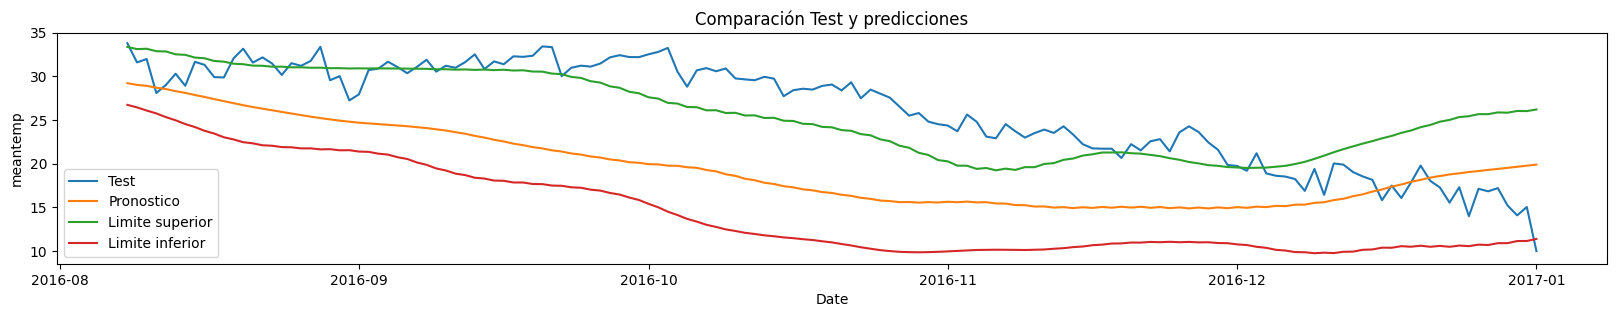

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot(test['meantemp'], label='Test')
ax.plot(prediction.forecast, label='Pronostico')
ax.plot(prediction.upper_forecast, label='Limite superior')
ax.plot(prediction.lower_forecast, label='Limite inferior')

ax.set_title('Comparación Test y predicciones')
ax.set_xlabel('Date')
ax.set_ylabel('meantemp')

ax.legend()

plt.show()

In [ ]:
# Metricas manuales
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['meantemp'], prediction.forecast)
rmse = np.sqrt(mean_squared_error(test['meantemp'], prediction.forecast))


print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 7.137205797788525
RMSE: 7.990847297620132


Recordamos que el Modelo sin regresores tiene las siguientes metricas =
MAE: 1.7656034024252854
RMSE: 2.169145978158312
Entonces, el modelo sin regresores tiene tanto el MAE como el RMSE más bajos en comparación con el modelo con regresores. Osea, el sin regresores tiene mejores resultados de predicción y comete menos errores grandes. Entonces, el modelo sin regresores parece ser el mejor en este caso según las métricas MAE y RMSE